In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\PG_DA\ML\\08-Linear-Regression-Models\\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop("sales", axis = 1)
y = df["sales"]

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_converter = PolynomialFeatures(degree = 2,  include_bias = False)

In [13]:
poly_features = poly_converter.fit_transform(X)

In [14]:
poly_features.shape

(200, 9)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [18]:
X_train.shape

(140, 9)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [25]:
test_pred = model.predict(X_test)

In [26]:
test_pred

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test,test_pred)

In [29]:
MSE = mean_squared_error(y_test,test_pred)

In [30]:
RMSE = np.sqrt(MSE)

In [31]:
MAE,RMSE

(0.4896798044803811, 0.6646431757269268)

In [32]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_feats = poly_converter.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(poly_feats, y , test_size = 0.3, random_state = 101)
    
    my_model = LinearRegression()
    my_model.fit(X_train,y_train)
    
    train_pred = my_model.predict(X_train)
    test_pred = my_model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [33]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.35170836883993467,
 0.25093429467703415,
 0.19712640340673274,
 5.421420423901486,
 0.14180399863580023,
 0.16654350003388185]

In [34]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825165035,
 0.5077742648623355,
 2.575831205082368,
 4.492668770849738,
 1381.4043738479102,
 4449.599764768951,
 95891.24543764142]

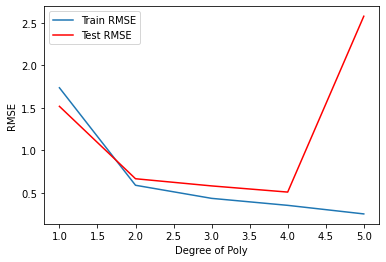

In [39]:
plt.plot(range(1,6), train_rmse_errors[:5], label = "Train RMSE")
plt.plot(range(1,6), test_rmse_errors[:5], label = "Test RMSE", color = "r")

plt.xlabel("Degree of Poly")
plt.ylabel("RMSE")

plt.legend()

In [40]:
final_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [41]:
final_model = LinearRegression()

In [42]:
final_poly_features = final_converter.fit_transform(X)
final_model.fit(final_poly_features, y)

LinearRegression()

In [43]:
from joblib import dump, load

In [44]:
dump(final_converter, "final_poly_converter.joblib")
dump(final_model, "final_polly_model.joblib")

['final_polly_model.joblib']

In [46]:
loaded_converter = load("final_poly_converter.joblib")
loaded_model = load("final_polly_model.joblib")

In [53]:
campaign = [[149,22,12]]

In [54]:
new_features = loaded_converter.fit_transform(campaign)
new_features

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [55]:
loaded_model.predict(new_features)

array([14.64501014])